# Import library

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Membaca Dataset

In [44]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [45]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [46]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

# Data cleaning pada dataset
## Menangani nilai NUll

In [47]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [48]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

In [49]:
df['bath'] = df['bath'].fillna(df['bath'].mean())
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [50]:
df['society'] = df['society'].fillna(df['society'].mode()[0])
df.isna().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [51]:
df['size'] = df['size'].fillna(df['size'].mode()[0])
df.isna().sum()

area_type       0
availability    0
location        1
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [52]:
df['location'] = df['location'].fillna(df['location'].mode()[0])
df.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Data Spliting

In [53]:
X = df[["bath", "balcony", "price"]]
Y = df["area_type"]

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 1)

## Algoritma KNN

In [55]:
modelKNN = KNeighborsClassifier(n_neighbors = 3)
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
modelKNN.score(X_train, Y_train)

0.7272629772629773

In [57]:
modelKNN.score(X_test, Y_test)

0.6393893893893894

## Algoritma Naive Bayes

In [58]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [59]:
gnb_predict = gnb.predict(X_test)

In [60]:
accuracy_score(gnb_predict, Y_test)

0.6851851851851852

# Decision Tree

In [73]:
modelDT = DecisionTreeClassifier().fit(X_train,Y_train)
print ("Akurasi Testting set Decision Tree : ",modelDT.score(X_test, Y_test))

Akurasi Testting set Decision Tree :  0.6719219219219219


In [74]:
modelDT = DecisionTreeClassifier().fit(X_train,Y_train)
print ("Akurasi Training set Decision Tree : ",modelDT.score(X_train, Y_train))

Akurasi Training set Decision Tree :  0.8148863148863149


In [68]:
Bengaluru_House_Data =[[1.5,1,2]]
modelDT.predict(Bengaluru_House_Data)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Super built-up  Area'], dtype=object)

## Visualisasi Desision Tree

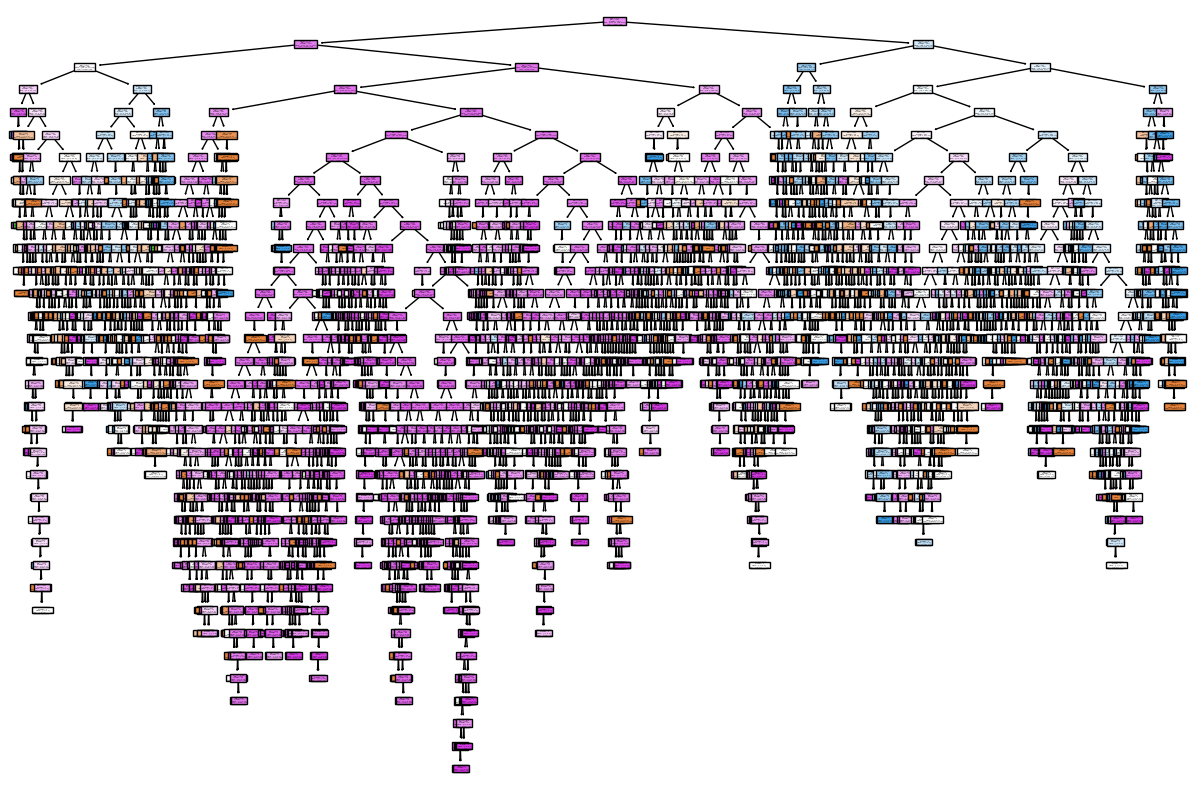

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(modelDT,feature_names=X.columns,filled=True,class_names=Y.unique())
plt.show()

# Membandingkan Akurasi 3 Algoritma

In [69]:
print("Hasil Score dari KNN : ")
print("Training set =",modelKNN.score(X_train, Y_train))
print("Testing set =",modelKNN.score(X_test, Y_test))
print("\n")
print("Hasil Score dari Naive Bayes : ")
print("Prediksi Akurasi =",accuracy_score(gnb_predict, Y_test))
print("\n")
print("Hasil Score dari Decision Tree : ")
print ("Akurasi Testting set Decision Tree : ",modelDT.score(X_test, Y_test))
print ("Akurasi Training set Decision Tree : ",modelDT.score(X_train, Y_train))

Hasil Score dari KNN : 
Training set = 0.7272629772629773
Testing set = 0.6393893893893894


Hasil Score dari Naive Bayes : 
Prediksi Akurasi = 0.6851851851851852


Hasil Score dari Decision Tree : 
Akurasi Testting set Decision Tree :  0.6724224224224224
Akurasi Training set Decision Tree :  0.8148863148863149
